# Whatsapp chat analysis

In [2]:
!python -m pip install --upgrade pip
!pip install numpy --upgrade --quiet
!pip install pandas --upgrade --quiet
!pip install matplotlib --upgrade --quiet
!pip install seaborn --upgrade --quiet
!pip install wordcloud --upgrade --quiet
!pip install emoji  --upgrade --quiet
!pip install plotly_express --upgrade --quiet

In [3]:
import os
import pandas as pd
import re
import datetime as time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import emoji
import re
from collections import Counter
import plotly.express as px

In [16]:
chat_file_path = 'rahulya_bhai.txt'
is_group = True # make false if it is not group chat

data = pd.read_fwf(chat_file_path)

In [6]:
data.head()

,"[17/10/19, 4:46:06 PM] Raहूल्या भाई मित्र परिवार: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp,",can,read,or,listen,to,them.
0,"[17/10/19, 4:46:06 PM] ‎Prathamesh Pohekar cre...",NaN,NaN,NaN,NaN,NaN,NaN
1,"[17/10/19, 4:46:06 PM] ‎Prathamesh Pohekar add...",NaN,NaN,NaN,NaN,NaN,NaN
2,"[17/10/19, 4:48:10 PM] Ashiish Karhade: 😆😆😆😆",NaN,NaN,NaN,NaN,NaN,NaN
3,"[17/10/19, 4:48:21 PM] Amit Gupta: Congratulat...",NaN,NaN,NaN,NaN,NaN,NaN
4,"[17/10/19, 4:48:26 PM] Swaroop Koli: 🤣",NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(f"Total messages: {data.shape[0]}")

Total messages: 10479


In [8]:
def txtTodf(txt_file):
    '''iOS Format only - Convert WhatsApp chat log text file to a Pandas dataframe.'''
    # some regex to account for messages taking up multiple lines
    #pat = re.compile(r'^(\d\d\/\d\d\/\d\d\d\d.*?)(?=^^\d\d\/\d\d\/\d\d\d\d|\Z)', re.S | re.M)
    with open(txt_file) as file:
        data = file.read()
        data = data.splitlines()

    user     = [] 
    message  = [] 
    datetime = []
    
    for row in data:
        # timestamp is before the first dash
        try:
            str_date = re.findall(r'\[.*?\]', row)[0]
            datetime.append(str(str_date)[1:-1].strip())
        except:
            datetime.append('')
        # sender is between am/pm, dash and colon
        try:
            s = re.search('] (.*?):', row).group(1)
            user.append(s)
        except:
            user.append('')
        # message content is after the first colon
        try:
            message.append(row.split(': ', 1)[1])
        except:
            message.append('')

    df = pd.DataFrame(zip(datetime, user, message), columns=['datetime', 'user', 'message'])
    #df['datetime'] = pd.to_datetime(df.datetime, format='%d/%m/%y, %I:%M:%S %p')
    # # remove events not associated with a sender
    df = df[df.user != ''].reset_index(drop=True)
    
    return df

whatsapp_df = txtTodf(chat_file_path)
#whatsapp_df

In [9]:
whatsapp_df['datetime'] = pd.to_datetime(whatsapp_df.datetime, format='%d/%m/%y, %I:%M:%S %p')

In [ ]:
# def Android_txtTodf(txt_file):
#     '''Convert WhatsApp chat log text file to a Pandas dataframe.'''
#     # some regex to account for messages taking up multiple lines
#     pat = re.compile(r'^(\d\d\/\d\d\/\d\d\d\d.*?)(?=^^\d\d\/\d\d\/\d\d\d\d|\Z)', re.S | re.M)
#     with open(txt_file) as file:
#         data = [m.group(1).strip().replace('\n', ' ') for m in pat.finditer(file.read())]

#     user     = []; 
#     message  = []; 
#     datetime = []
    
#     for row in data:
#         # timestamp is before the first dash
#         datetime.append(row.split(' - ')[0])
#         # sender is between am/pm, dash and colon
#         try:
#             s = re.search('m - (.*?):', row).group(1)
#             user.append(s)
#         except:
#             user.append('')

#         # message content is after the first colon
#         try:
#             message.append(row.split(': ', 1)[1])
#         except:
#             message.append('')

#     df = pd.DataFrame(zip(datetime, user, message), columns=['datetime', 'user', 'message'])
#     df['datetime'] = pd.to_datetime(df.datetime, format='%d/%m/%Y, %I:%M %p')

#     # remove events not associated with a sender
#     df = df[df.user != ''].reset_index(drop=True)
    
#     return df

# #whatsapp_df = Android_txtTodf('chat.txt')

In [10]:
whatsapp_df.head(10)

,datetime,user,message
0,2019-10-17 16:46:06,Raहूल्या भाई मित्र परिवार,‎Messages and calls are end-to-end encrypted. ...
1,2019-10-17 16:48:10,Ashiish Karhade,😆😆😆😆
2,2019-10-17 16:48:21,Amit Gupta,"Congratulations rahulya Bhai, on your fan club"
3,2019-10-17 16:48:26,Swaroop Koli,🤣
4,2019-10-17 16:48:35,Amit Gupta,Abhinandan abhinandan 🙏🙏🙏
5,2019-10-17 16:49:19,Prathamesh Pohekar,राहुल्या भाई मित्र परिवार या ग्रुप मध्ये मी प्...
6,2019-10-17 16:49:23,Amit Gupta,Rahulya Bhai is super hot
7,2019-10-17 16:49:38,Ashiish Karhade,🤣🤣🤣
8,2019-10-17 16:49:59,Ashiish Karhade,🧲
9,2019-10-17 16:50:03,Amit Gupta,राहुल्या भाई मित्र परिवार या ग्रुप मध्ये मी अम...


### Cleaning Images from Data

In [11]:
img = whatsapp_df[whatsapp_df['message'] == "<Media omitted>" ]
whatsapp_df.drop(img.index, inplace=True)

In [12]:
img = whatsapp_df[whatsapp_df['message'] == "<image omitted>" ]
print(img.shape)
whatsapp_df.drop(img.index, inplace=True)

(0, 3)


In [13]:
whatsapp_df.reset_index(inplace=True, drop=True)
print(whatsapp_df.shape)

(9618, 3)


## Exploratory Data Analysis

Questions:

1. Who are the different people in the group chat?

2. Who are the most active users in the group?

3. What is the timeline of data we have?

4. What is the most active time of messages in group throughout the day?

5. Which was the busiest month or most active months of conversation?

6. Which emoji was used most in messages?

7. What were the most emojis used depending on users?

8. What are the top words used in the conversation?

IDEAS -&gt; Add word count and letter count columns so as to know who sends more messages and who send long messages

### 1. Who are the different people in the group chat?

In [21]:
users = whatsapp_df.user.unique()


if is_group:
    users = np.delete(users, 0)
    
print('User name that involved in the chat:', users)
print('Total users in the chat:', len(users)) # one of the username is actully group name

User name that involved in the chat: ['Ashiish Karhade' 'Amit Gupta' 'Swaroop Koli' 'Prathamesh Pohekar'
 'Aniket Ingle' 'Yash Sonone' 'Rahul Kumawat' 'Rahul Magare' 'Ankit Jha'
 'Hemant Shelar' 'Aniket Jadhav']
Total users in the chat: 11


### 2. Who are the most active users in the group?

In [24]:
user_df = whatsapp_df.groupby('user')['message'].count().sort_values(ascending=False).reset_index()

In [25]:
if is_group:
    user_df.drop(index=11, axis=0, inplace=True)

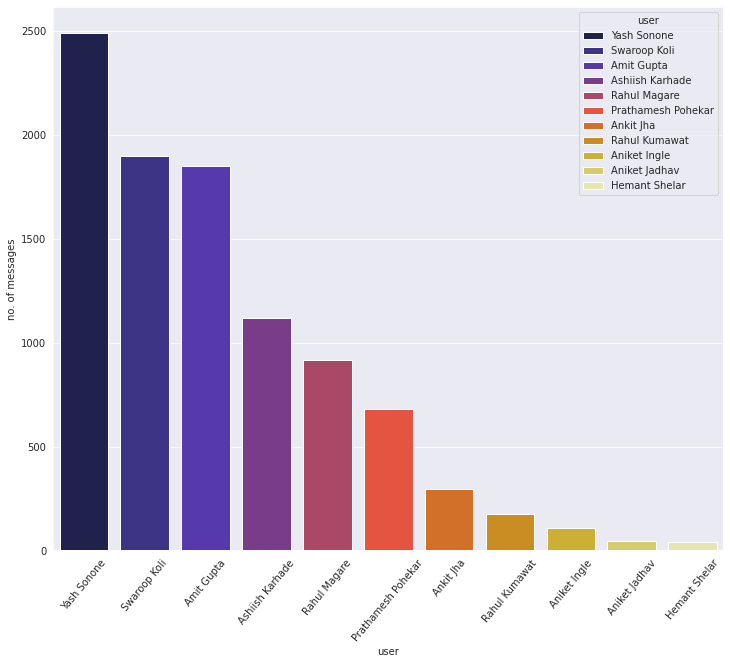

In [26]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

#plt.title("Most active users in conversation")
barplot = sns.barplot(data=user_df, x="user", y="message", hue="user", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=user_df.user)
plt.ylabel("no. of messages")
plt.show()

### 3. What is the timeline of data we have?

In [27]:
start = whatsapp_df.datetime.min()
end = whatsapp_df.datetime.max()

difference = end-start
print("The chat data started from {} upto {}".format(start, end))
print("which approximately consists of {} hours".format(difference))

The chat data started from 2019-10-17 16:46:06 upto 2021-04-24 12:40:03
which approximately consists of 554 days 19:53:57 hours


In [28]:
## AVERAGE MESSAGES PER DAY
difference.to_timedelta64()

average = whatsapp_df.shape[0]/difference.days
print("Average no. of messages per day: {} messages per day".format(int(average)))

Average no. of messages per day: 17 messages per day


### 4. What is the most active time of messages in group throughout the day?

In [29]:
whatsapp_df1 = whatsapp_df.copy()
whatsapp_df1["hours"] = whatsapp_df['datetime'].apply(lambda x: x.hour)
times_df = whatsapp_df1.groupby('hours').count().reset_index().sort_values(by = 'hours')

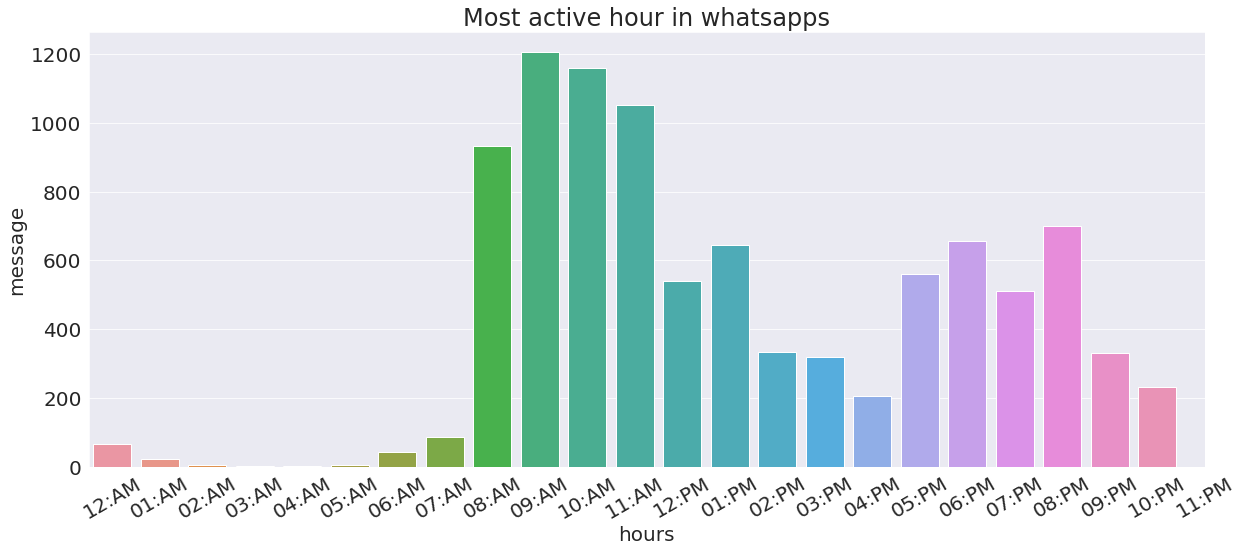

In [30]:
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (20, 8)
sns.set_style("darkgrid")

plt.title('Most active hour in whatsapps');
time_plot = sns.barplot(x="hours",y="message",data = times_df,dodge=False)
labels=["12:AM","01:AM","02:AM","03:AM","04:AM","05:AM","06:AM","07:AM","08:AM","09:AM","10:AM","11:AM","12:PM","01:PM","02:PM","03:PM","04:PM","05:PM","06:PM","07:PM","08:PM","09:PM","10:PM","11:PM"]
#time_plot.set_xticklabels(rotation=15, labels=labels)
plt.xticks([i for i in range(24)], labels=labels, rotation=30)
plt.show()

### 5. Which was the busiest month or most active months of conversation?

In [31]:
whatsapp_df2 = whatsapp_df.copy()

whatsapp_df2["months"] = whatsapp_df["datetime"].apply(lambda x: x.month)

months_df = whatsapp_df2.groupby("months")["message"].count().sort_values(ascending=False).reset_index()

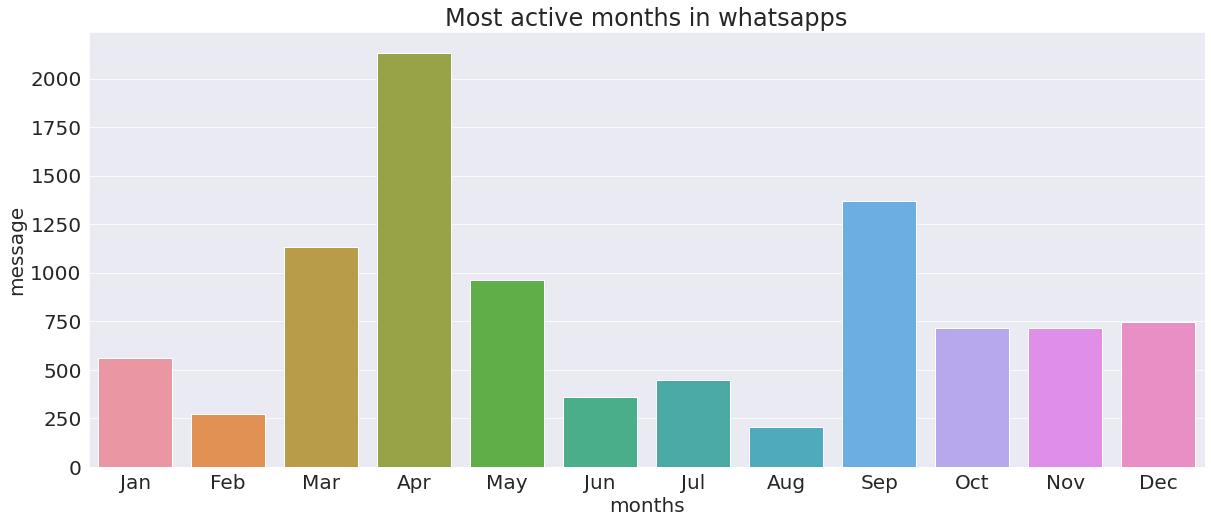

In [32]:
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (20, 8)
sns.set_style("darkgrid")

plt.title('Most active months in whatsapps');

month_plot = sns.barplot(x="months", y="message", data=months_df)
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ticks=[i for i in range(12)], labels=labels, rotation=0)
plt.show()

### 6. Which emoji was used most in messages?

In [33]:
whatsapp_df3 = whatsapp_df.copy()

emoji_counter = Counter()

emoji_list = list(emoji.UNICODE_EMOJI_ENGLISH.keys())
r = re.compile('|'.join(re.escape(p) for p in emoji_list))
#print(r)
for idx, row in whatsapp_df3.iterrows():
    found = r.findall(row["message"])
    for emojif in found:
        emoji_counter[emojif] += 1

In [34]:
emojis_df = pd.DataFrame()
emojis_df['emoji'] = [''] * 10
emojis_df['number_of_Emoji'] = [0] * 10

i = 0
for item in emoji_counter.most_common(10):
    emojis_df.emoji[i] = item[0]
    emojis_df.number_of_Emoji[i] = int(item[1])
    i += 1

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
emojis_df

,emoji,number_of_Emoji
0,😂,1295
1,🤣,230
2,🔥,195
3,🏻,109
4,😆,106
5,🙏,103
6,👍,94
7,😅,69
8,🥳,57
9,🖕,47


In [36]:
fig = px.pie(emojis_df, values='number_of_Emoji', names='emoji',title='Emoji percentage used in chat group')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### 7. What were the most emojis used depending on users?

In [37]:
user_emoji_df = whatsapp_df.copy()

user_emoji_counter = Counter()
emoji_list = list(emoji.UNICODE_EMOJI_ENGLISH.keys())
r = re.compile('|'.join(re.escape(p) for p in emoji_list))

for idx, row in whatsapp_df3.iterrows():
    found = r.findall(row["message"])
    for emojif in found:
        emoji_counter[emojif] += 1

In [38]:
def emojis_return(x):
    c = Counter()
    found = r.findall(x)
    for emoji_found in found:
        c[emoji_found] += 1
    return dict(c)

In [39]:
user_emoji_df["no.of emojis"] = user_emoji_df["message"].apply(lambda x : emojis_return(x))

In [40]:
user_emoji_df.head()

,datetime,user,message,no.of emojis
0,2019-10-17 16:46:06,Raहूल्या भाई मित्र परिवार,‎Messages and calls are end-to-end encrypted. ...,{}
1,2019-10-17 16:48:10,Ashiish Karhade,😆😆😆😆,{'😆': 4}
2,2019-10-17 16:48:21,Amit Gupta,"Congratulations rahulya Bhai, on your fan club",{}
3,2019-10-17 16:48:26,Swaroop Koli,🤣,{'🤣': 1}
4,2019-10-17 16:48:35,Amit Gupta,Abhinandan abhinandan 🙏🙏🙏,{'🙏': 3}


In [41]:
ashiish_emojis = user_emoji_df[user_emoji_df["user"]=="Ashiish Karhade"]
lister = []
for item in ashiish_emojis["no.of emojis"]:
    lister.append(item)
print(lister)

[{'😆': 4}, {'🤣': 3}, {'🧲': 1}, {}, {}, {'😂': 1}, {}, {'😂': 1}, {'😂': 2}, {'😁': 1}, {}, {'😄': 2}, {}, {'😂': 2}, {}, {'🤣': 2}, {'🚀': 1}, {}, {'😂': 2}, {}, {'😬': 1}, {'😆': 3}, {}, {'😂': 1}, {'😄': 1}, {'😄': 1}, {'😆': 24}, {}, {}, {}, {}, {}, {}, {}, {}, {'💨': 1}, {'👏': 1, '🏻': 1, '✅': 1}, {}, {}, {}, {}, {'🤗': 1}, {'😂': 2}, {}, {'🤟': 1, '🏻': 1}, {}, {'😂': 2, '🤣': 1}, {}, {}, {}, {}, {}, {}, {'😀': 1}, {}, {'👀': 1}, {}, {}, {}, {}, {}, {}, {}, {}, {'😆': 2}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {'😃': 1}, {}, {}, {}, {'😁': 1}, {'😁': 1, '😅': 1}, {}, {}, {}, {}, {'😅': 1}, {}, {}, {}, {}, {}, {}, {}, {'😄': 1}, {'😃': 1}, {'😄': 1, '😂': 1}, {'😅': 1}, {'😅': 1}, {}, {}, {'🤟': 1, '🏻': 1}, {'😂': 1}, {}, {'😆': 2}, {'😂': 1, '🤣': 1}, {'😄': 1, '😁': 1, '😂': 1}, {'🤣': 4}, {}, {'😄': 1}, {'🤔': 1, '💭': 1}, {}, {'😁': 1}, {'😂': 1}, {}, {'😄': 1}, {'✊': 1, '🏻': 1}, {}, {}, {'✊': 1, '🏻': 1}, {}, {'😂': 1, '😅': 1, '😇': 1}, {'😂': 2}, {}, {'🤟': 1, '🏻': 1}, {}, {'😂': 1}, {}, {}, {}, {}, {}, {}, {'🤟': 1, '🏻': 1}, {}, {}

### 8. What are the top words used in the conversation?

In [42]:
from wordcloud import WordCloud, STOPWORDS

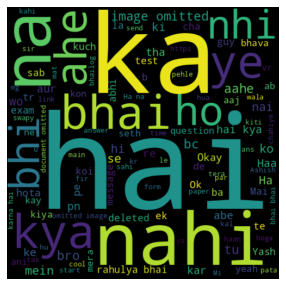

In [43]:
whatsapp_df4 = whatsapp_df.copy()
stopwords = set(STOPWORDS)

word = " ".join(review for review in whatsapp_df4.message)
#stopwords.update(["the","is","yea","ok","okay","or","bye","no","will","yeah","I","almost","if","me","you","done","want","Ya"])

wordcloud = WordCloud(width = 500, height =500 ,stopwords=stopwords, background_color="black",min_font_size = 10).generate(word)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

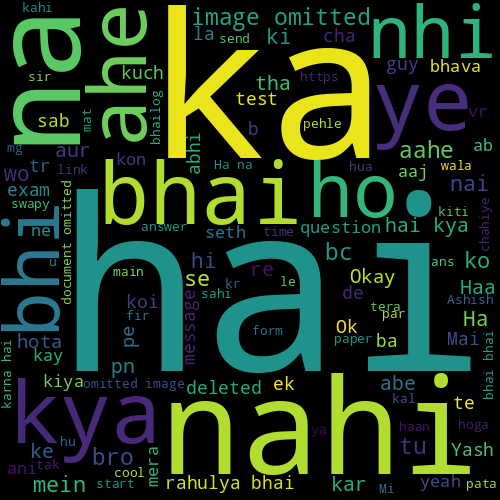

In [44]:
wordcloud.to_image()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee8e7939-c4c7-44d7-967f-972aa6fac8de' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>